In [18]:
# Importing the libraries
from sklearn.datasets import make_regression

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [19]:
# Creating Dummy dataset
X,y = make_regression(n_samples=100, n_features=1, n_informative=1, n_targets=1, noise=20, random_state=10)

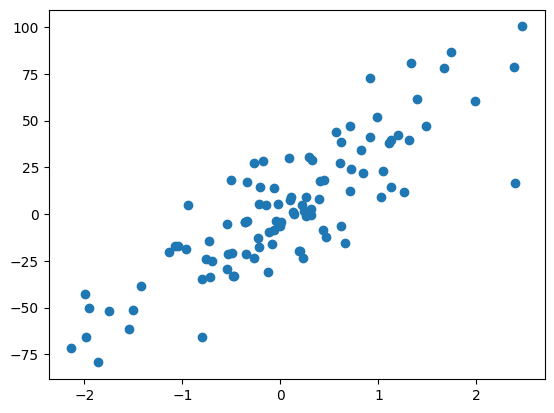

In [20]:
# Plotting the graph of X and y
plt.scatter(X,y)

In [21]:
# Trying simple Linear Regression model where by default value of alpha = 0
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X,y)
print(lr.coef_)
print(lr.intercept_)

[31.34493951]
1.0560830217516393


In [22]:
# Trying for alpha =  10
from sklearn.linear_model import Ridge
rr = Ridge(alpha=10)
rr.fit(X,y)
print(rr.coef_)
print(rr.intercept_)

[28.31692669]
1.2965576951719218


In [23]:
# Trying for alpha =  100
rr2 = Ridge(alpha=100)
rr2.fit(X,y)
print(rr2.coef_)
print(rr2.intercept_)

[15.14738848]
2.342438471999783


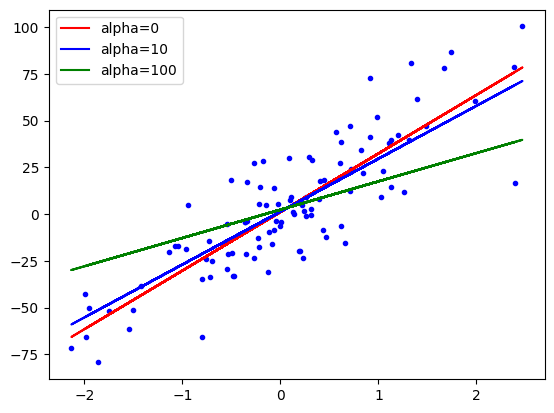

In [25]:
# For comparison printing the graph with respect to different values of alpha (lambda)
plt.plot(X,y,'b.')
plt.plot(X,lr.predict(X),color='red',label='alpha=0')
plt.plot(X,rr.predict(X),color='blue',label='alpha=10')
plt.plot(X,rr2.predict(X),color='green',label='alpha=100')
plt.legend()

In [29]:
# Creating Our Own Ridge Class
class MyRidge:

  def __init__(self,alpha=0.1):
    self.alpha = alpha
    self.b = None
    self.m = None

  def fit(self,X_train,y_train):
    num = 0
    den = 0

    for i in range(X_train.shape[0]):
      num = num + ((y_train[i] - y_train.mean()) * (X_train[i] - X_train.mean()))
      den = den + (X_train[i] - X_train.mean())*(X_train[i] - X_train.mean())

    self.m = num/(den + self.alpha)
    self.b = y_train.mean() - (self.m * X_train.mean())
    print(self.m,self.b)

  def predict(self,X_test):
    return self.m * X_test + self.b

In [30]:
# Creating Object of our class and fitting the model
mr = MyRidge(alpha=10)
mr.fit(X,y)

[28.31692669] [1.2965577]
